In [202]:
import pandas as pd
from binance.client import Client
import datetime as dt

lines = []
with open('C:/Users/John Carlo/Documents/python/binance_things.txt', 'r') as f:
    lines = f.readlines()

count = 0
for line in lines:
    count += 1
    #print(f'line {count}: {line}')
    
#print(lines)
#print(lines[0].replace("\n",""))

In [203]:
api_key = lines[0].replace("\n","")
api_secret = lines[1]
client = Client(api_key, api_secret)

In [204]:
symbol = "ADAUSDT"
interval='1d'
Client.KLINE_INTERVAL_1DAY
klines = client.get_historical_klines(symbol, interval, "1 Jan,2021")
data_raw = pd.DataFrame(klines)
 # create colums name
data_raw.columns = ['open_time','Open', 'High', 'Low', 'Close', 'Volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
# change the timestamp
# original line -> data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]
data_raw.index = [dt.datetime.fromtimestamp(x/1000.0).strftime("%Y-%m-%d") for x in data_raw.close_time]
#data_raw.to_csv(symbol+'.csv', index = None, header=True)
##convert data to float and plot
#df = data.astype(float)
#df["close"].plot(title = 'ADAUSDT', legend = 'close')
data = data_raw.drop(columns=['open_time','close_time', 'qav', 'num_trades', 'taker_base_vol', 'taker_quote_vol', 'ignore'])
data.insert(4, 'Adj Close', data['Close'])
data.index.name='Date'
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-02,0.18134000,0.18473000,0.17000000,0.17509000,0.17509000,462201570.90000000
2021-01-03,0.17505000,0.18457000,0.16793000,0.17742000,0.17742000,660303281.20000000
2021-01-04,0.17740000,0.20960000,0.17255000,0.20615000,0.20615000,1201451449.30000000
2021-01-05,0.20625000,0.23992000,0.19203000,0.22528000,0.22528000,1463415575.60000000
2021-01-06,0.22518000,0.26429000,0.20696000,0.25873000,0.25873000,1478887679.33000000


In [210]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
yf.pdr_override()
startdate = date(2021,1,1)
end_date = date.today()
print(end_date)
stocksymbols = ['ADAUSDT']

2022-07-25


In [190]:
stocksymbols = ['AAPL']

def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
     data = web.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end )
     return data
data = getMyPortfolio(stocksymbols)
print(type(data))
data

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,134.080002,134.740005,131.720001,132.690002,131.515976,99116600
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.264999,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.850830,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.479851,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.761627,109578200
...,...,...,...,...,...,...
2022-07-18,150.740005,151.570007,146.699997,147.070007,147.070007,81420900
2022-07-19,147.919998,151.229996,146.910004,151.000000,151.000000,82982400
2022-07-20,151.119995,153.720001,150.369995,153.039993,153.039993,64823400


# SMA Method back testing


In [211]:
data['SMA 30'] = ta.sma(data['Close'],30)
data['SMA 100'] = ta.sma(data['Close'],100)
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

In [212]:
data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price
Date,,,,,,,,,,
2021-01-02,0.18134000,0.18473000,0.17000000,0.17509000,0.17509000,462201570.90000000,NaN,NaN,NaN,NaN
2021-01-03,0.17505000,0.18457000,0.16793000,0.17742000,0.17742000,660303281.20000000,NaN,NaN,NaN,NaN
2021-01-04,0.17740000,0.20960000,0.17255000,0.20615000,0.20615000,1201451449.30000000,NaN,NaN,NaN,NaN
2021-01-05,0.20625000,0.23992000,0.19203000,0.22528000,0.22528000,1463415575.60000000,NaN,NaN,NaN,NaN
2021-01-06,0.22518000,0.26429000,0.20696000,0.25873000,0.25873000,1478887679.33000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-07-22,0.49100000,0.50230000,0.47560000,0.49930000,0.49930000,261898181.10000000,0.467197,0.600189,NaN,NaN
2022-07-23,0.49940000,0.51140000,0.47700000,0.48280000,0.48280000,200329666.40000000,0.467977,0.595277,NaN,NaN
2022-07-24,0.48270000,0.51860000,0.47300000,0.51700000,0.51700000,199660186.40000000,0.469210,0.591117,NaN,NaN


In [213]:
selected_rows = data[~data['Buy_Signal_price'].isnull()]
print(selected_rows)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-04-11  1.20201000  1.25199000  1.19157000  1.21747000  1.21747000   
2021-08-19  1.92400000  2.16430000  1.87000000  2.10430000  2.10430000   
2022-04-16  0.93300000  0.95900000  0.92900000  0.95600000  0.95600000   

                        Volume    SMA 30   SMA 100 Buy_Signal_price  \
Date                                                                  
2021-04-11  290774078.00000000  1.177189  0.820650       1.21747000   
2021-08-19  486614298.90000000  1.508127  1.506226       2.10430000   
2022-04-16   42541809.70000000  1.052867  1.047930       0.95600000   

           Sell_Signal_price  
Date                          
2021-04-11               NaN  
2021-08-19               NaN  
2022-04-16               NaN  


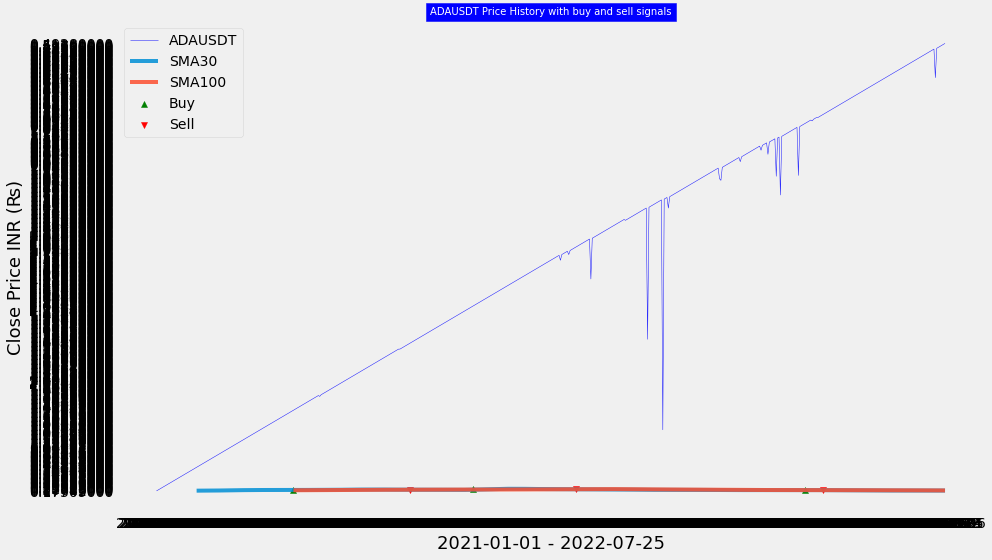

In [214]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

# MACD Method Backtesting

In [215]:
macd = ta.macd(data['Close'])
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2021-01-02,NaN,NaN,NaN
2021-01-03,NaN,NaN,NaN
2021-01-04,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN
...,...,...,...
2022-07-22,-0.000223,0.008997,-0.009220
2022-07-23,0.000469,0.007751,-0.007282
2022-07-24,0.003734,0.008813,-0.005079


In [221]:
data = pd.concat([data, macd], axis=1).reindex(data.index)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,,,,,,,,,
2021-01-02,0.18134000,0.18473000,0.17000000,0.17509000,0.17509000,462201570.90000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2021-01-03,0.17505000,0.18457000,0.16793000,0.17742000,0.17742000,660303281.20000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2021-01-04,0.17740000,0.20960000,0.17255000,0.20615000,0.20615000,1201451449.30000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2021-01-05,0.20625000,0.23992000,0.19203000,0.22528000,0.22528000,1463415575.60000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2021-01-06,0.22518000,0.26429000,0.20696000,0.25873000,0.25873000,1478887679.33000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-22,0.49100000,0.50230000,0.47560000,0.49930000,0.49930000,261898181.10000000,0.467197,0.600189,NaN,NaN,-0.000223,0.008997,-0.009220,NaN,NaN,True,-0.000223,0.008997,-0.009220
2022-07-23,0.49940000,0.51140000,0.47700000,0.48280000,0.48280000,200329666.40000000,0.467977,0.595277,NaN,NaN,0.000469,0.007751,-0.007282,NaN,NaN,False,0.000469,0.007751,-0.007282
2022-07-24,0.48270000,0.51860000,0.47300000,0.51700000,0.51700000,199660186.40000000,0.469210,0.591117,NaN,NaN,0.003734,0.008813,-0.005079,NaN,NaN,True,0.003734,0.008813,-0.005079


In [222]:
def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['Adj Close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Adj Close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['Adj Close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['Adj Close'][i] < df['Adj Close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell

In [223]:
MACD_strategy = MACD_Strategy(data, 0.025)
MACD_strategy

KeyError: 0

In [224]:
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

data['positive'] = MACD_color(data)
data

KeyError: 0

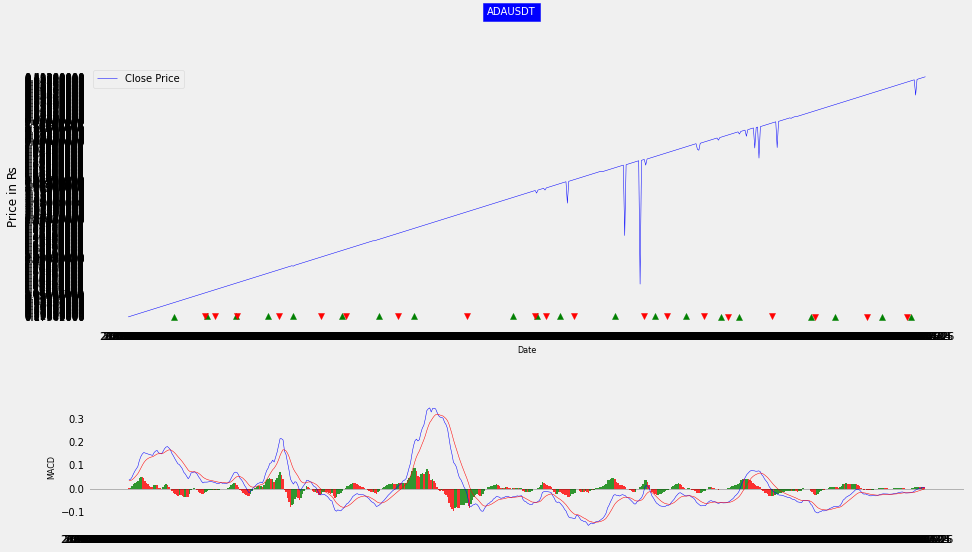

In [220]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Adj Close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index,'MACDh_12_26_9', data=data, label='Volume', color=data.positive.map({True: 'g', False: 'r'}),width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()

# Bollinger Band Backtesting strategy

In [24]:
def bb_strategy(data):
    bbBuy = []
    bbSell = []
    position = False
    bb = ta.bbands(data['Adj Close'], length=20,std=2)
    data = pd.concat([data, bb], axis=1).reindex(data.index)

    for i in range(len(data)):
        if data['Adj Close'][i] < data['BBL_20_2.0'][i]:
            if position == False :
                bbBuy.append(data['Adj Close'][i])
                bbSell.append(np.nan)
                position = True
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        elif data['Adj Close'][i] > data['BBU_20_2.0'][i]:
            if position == True:
                bbBuy.append(np.nan)
                bbSell.append(data['Adj Close'][i])
                position = False #To indicate that I actually went there
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        else :
            bbBuy.append(np.nan)
            bbSell.append(np.nan)

    data['bb_Buy_Signal_price'] = bbBuy
    data['bb_Sell_Signal_price'] = bbSell

    return data

In [25]:
#storing the function
data = bb_strategy(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,...,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,bb_Buy_Signal_price,bb_Sell_Signal_price
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-03,39.262501,39.302502,38.755001,38.892502,36.818211,108389200,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-04,39.017502,39.349998,38.922501,39.097500,37.012287,82239600,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,39.264999,39.730000,39.167500,39.702499,37.584999,87481200,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,39.650002,40.457500,39.567501,40.020000,37.885582,144823600,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,39.814999,40.317501,39.777500,40.264999,38.117512,104526000,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18,150.740005,151.570007,146.699997,147.070007,147.070007,81420900,141.152667,154.428801,NaN,NaN,...,NaN,NaN,False,131.974765,141.8245,151.674235,13.890033,0.766277,NaN,NaN
2022-07-19,147.919998,151.229996,146.910004,151.000000,151.000000,82982400,141.340000,154.338100,NaN,NaN,...,NaN,NaN,True,133.362302,142.7965,152.230699,13.213487,0.934775,NaN,NaN
2022-07-20,151.119995,153.720001,150.369995,153.039993,153.039993,64823400,141.570000,154.241100,NaN,NaN,...,NaN,NaN,True,133.783499,143.6550,153.526502,13.743345,0.975358,NaN,NaN


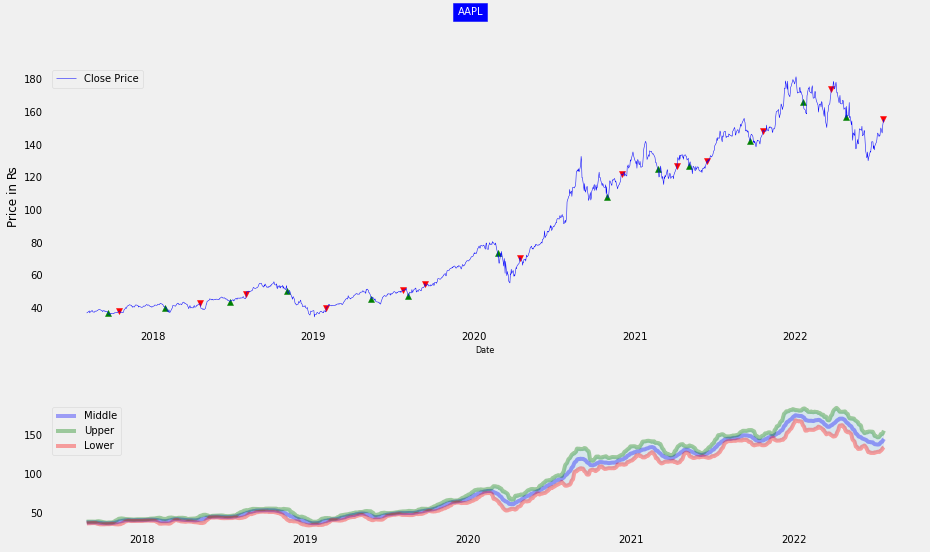

In [26]:
#plot
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot(data['Adj Close'],label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['bb_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['bb_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.plot(data['BBM_20_2.0'], label='Middle', color='blue', alpha=0.35) #middle band
ax2.plot(data['BBU_20_2.0'], label='Upper', color='green', alpha=0.35) #Upper band
ax2.plot(data['BBL_20_2.0'], label='Lower', color='red', alpha=0.35) #lower band
ax2.fill_between(data.index, data['BBL_20_2.0'], data['BBU_20_2.0'], alpha=0.1)
ax2.legend(loc='upper left')
ax2.grid()
plt.show()